# Stock Price / BitCoin / Crypto Currency Prediction Using LSTM

Agenda

1. Collect stock market data
2. Preprocess & Split 
3. Create a LSTM model & Train
4. Predict & Plot & Evaluate
5. Predict Future.

In [ ]:
# !pip install yfinance

In [406]:
import datetime
import numpy as np
import pandas as pd

import yfinance as yf
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
print(tf.__version__)

2.7.0


In [269]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2022-01-23'

# Bitcoin USD (BTC-USD)

# Set the ticker
# State Bank of India: 'SBIN.NS'
# Thoughtworks: TWKS

ticker = 'BTC-USD'

In [270]:
# Get the data
data = yf.download(ticker, start_date, end_date)
n = 3
data.head(n).append(data.tail(n))

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2022-01-20,41744.027344,43413.023438,40672.824219,40680.417969,40680.417969,20382033940
2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031
2022-01-22,36685.859375,36685.859375,34349.250000,35497.183594,35497.183594,50002944000


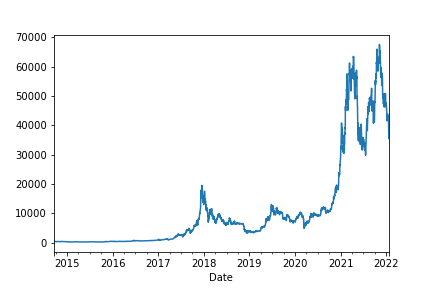

In [271]:
# Plot adjusted close price data
%matplotlib widget
data['Close'].plot()
plt.show()

In [272]:
file_path = f'datasets/stock_{ticker}.csv'
data.to_csv(file_path)

# Load the Stock data

In [273]:
data = pd.read_csv(file_path,index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [274]:
close_price = data[['Close']]
close_price.head(n).append(close_price.tail(n))

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2022-01-20,40680.417969
2022-01-21,36457.316406
2022-01-22,35497.183594


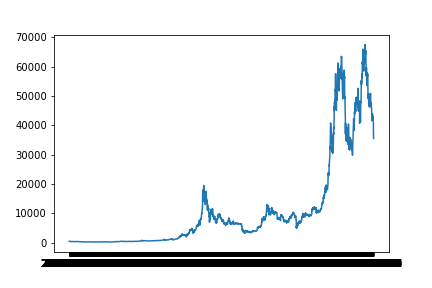

In [314]:
%matplotlib widget
# plt.figure(figsize=(15,5))
plt.plot(close_price);

# NN's are sensitive to scale of the data. So we apply Data Scaling

In [356]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
df1 = scaler.fit_transform(close_price)
print(df1.shape)
print(type(df1))

(2685, 1)
<class 'numpy.ndarray'>


In [357]:
df1 = pd.DataFrame(df1, index=close_price.index)
df1.head(2).append(df1.tail(2))

,0
Date,
2014-09-17,-0.663885
2014-09-18,-0.665952
2022-01-21,1.598418
2022-01-22,1.538082


# Data Preparation - Shifts

In [409]:
shifts_count = 25
    
df2 = df1.copy()
for i in range(1, shifts_count+1):
    df2["shift_"+str(i)] = df2[0].shift(i)
df2.head()

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.663885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-0.665952,-0.663885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,-0.667815,-0.665952,-0.663885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,-0.666928,-0.667815,-0.665952,-0.663885,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,-0.667562,-0.666928,-0.667815,-0.665952,-0.663885,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
print(df1.shape)
df2.dropna(inplace=True)
print(df2.shape)
df2.head(3).append(df2.tail(3))

(2685, 1)
(2660, 26)


,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-12,-0.668836,-0.669857,-0.669903,-0.669685,-0.670445,-0.671498,-0.671882,-0.672483,-0.671958,-0.670032,...,-0.667210,-0.666760,-0.666029,-0.665238,-0.667352,-0.667562,-0.666928,-0.667815,-0.665952,-0.663885
2014-10-13,-0.668090,-0.668836,-0.669857,-0.669903,-0.669685,-0.670445,-0.671498,-0.671882,-0.672483,-0.671958,...,-0.667518,-0.667210,-0.666760,-0.666029,-0.665238,-0.667352,-0.667562,-0.666928,-0.667815,-0.665952
2014-10-14,-0.667433,-0.668090,-0.668836,-0.669857,-0.669903,-0.669685,-0.670445,-0.671498,-0.671882,-0.672483,...,-0.668922,-0.667518,-0.667210,-0.666760,-0.666029,-0.665238,-0.667352,-0.667562,-0.666928,-0.667815
2022-01-20,1.863806,1.930664,1.970336,1.962475,2.016729,2.020720,2.015837,1.983906,2.069215,1.992973,...,2.191661,2.226886,2.282633,2.304100,2.217355,2.272133,2.226044,2.297944,2.489710,2.500336
2022-01-21,1.598418,1.863806,1.930664,1.970336,1.962475,2.016729,2.020720,2.015837,1.983906,2.069215,...,2.045329,2.191661,2.226886,2.282633,2.304100,2.217355,2.272133,2.226044,2.297944,2.489710
2022-01-22,1.538082,1.598418,1.863806,1.930664,1.970336,1.962475,2.016729,2.020720,2.015837,1.983906,...,2.019685,2.045329,2.191661,2.226886,2.282633,2.304100,2.217355,2.272133,2.226044,2.297944


## Data Split

In [411]:
# Testing Data is from Oct 2021 till 21st Jan 2022 (till date)
split_date = "2021-06-31"

In [412]:
train_data = df2[:split_date]
test_data = df2[split_date:]
train_data.shape, test_data.shape

((2454, 26), (206, 26))

In [413]:
train_data.head(2).append(train_data.tail(2))

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-12,-0.668836,-0.669857,-0.669903,-0.669685,-0.670445,-0.671498,-0.671882,-0.672483,-0.671958,-0.670032,...,-0.667210,-0.666760,-0.666029,-0.665238,-0.667352,-0.667562,-0.666928,-0.667815,-0.665952,-0.663885
2014-10-13,-0.668090,-0.668836,-0.669857,-0.669903,-0.669685,-0.670445,-0.671498,-0.671882,-0.672483,-0.671958,...,-0.667518,-0.667210,-0.666760,-0.666029,-0.665238,-0.667352,-0.667562,-0.666928,-0.667815,-0.665952
2021-06-29,1.561371,1.471291,1.484821,1.330019,1.295550,1.485625,1.426591,1.350089,1.297995,1.550720,...,1.764355,1.541559,1.653536,1.613832,1.654210,1.410855,1.416390,1.561031,1.541524,1.625886
2021-06-30,1.509404,1.561371,1.471291,1.484821,1.330019,1.295550,1.485625,1.426591,1.350089,1.297995,...,1.834776,1.764355,1.541559,1.653536,1.613832,1.654210,1.410855,1.416390,1.561031,1.541524


In [414]:
print(np.array(train_data).shape)
print(np.array(test_data).shape)

(2454, 26)
(206, 26)


In [415]:
# Data Prep
X_train, y_train = train_data.drop(columns=[0]), train_data[0]
X_test, y_test = test_data.drop(columns=[0]), test_data[0]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2454, 25) (2454,) (206, 25) (206,)


In [416]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2454, 25) (2454,) (206, 25) (206,)


In [417]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape, X_test.shape)

(2454, 25, 1) (206, 25, 1)


In [418]:
# Create a LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],1)))
# model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(LSTM(16, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 64)                16896     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 264       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 19,249
Trainable params: 19,249
Non-trainable params: 0
_________________________________________________________________


In [419]:
# my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=7),]
my_callbacks = []

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1,callbacks=my_callbacks)

Epoch 1/100
77/77 [==============================] - 3s 20ms/step - loss: 0.1465 - val_loss: 0.2189
Epoch 2/100
77/77 [==============================] - 1s 14ms/step - loss: 0.0445 - val_loss: 0.1818
Epoch 3/100
77/77 [==============================] - 1s 15ms/step - loss: 0.0361 - val_loss: 0.3698
Epoch 4/100
77/77 [==============================] - 1s 13ms/step - loss: 0.0397 - val_loss: 0.3752
Epoch 5/100
77/77 [==============================] - 1s 15ms/step - loss: 0.0320 - val_loss: 0.1734
Epoch 6/100
77/77 [==============================] - 1s 15ms/step - loss: 0.0358 - val_loss: 0.2659
Epoch 7/100
77/77 [==============================] - 1s 14ms/step - loss: 0.0280 - val_loss: 0.1216
Epoch 8/100
77/77 [==============================] - 1s 14ms/step - loss: 0.0318 - val_loss: 0.1164
Epoch 9/100
77/77 [==============================] - 1s 14ms/step - loss: 0.0215 - val_loss: 0.1200
Epoch 10/100
77/77 [==============================] - 1s 14ms/step - loss: 0.0296 - val_loss: 0.1092

In [421]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3364), started 0:02:36 ago. (Use '!kill 3364' to kill it.)

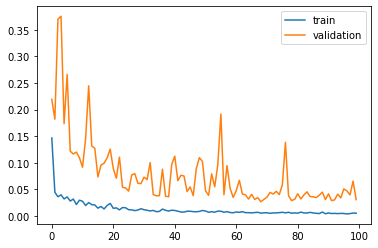

In [422]:
%matplotlib inline
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

# Predictions

In [423]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

print(train_preds.shape, test_preds.shape)

print("Training: ",math.sqrt(mean_squared_error(y_train, train_preds)))
print("Testing: ",math.sqrt(mean_squared_error(y_test, test_preds)))

print("Training: ",mean_absolute_error(y_train, train_preds))
print("Testing: ",mean_absolute_error(y_test, test_preds))

(2454, 1) (206, 1)
Training:  14843.100090083657
Testing:  48036.79202478567
Training:  9998.166364048511
Testing:  47486.467964221716


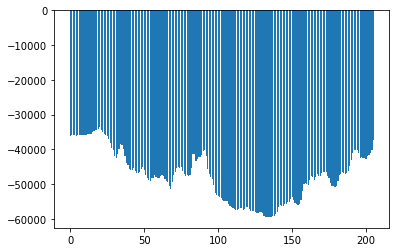

In [443]:
errors = (y_test - test_preds.flatten())
%matplotlib inline
plt.bar(x=range(0,len(errors)),height=errors)
plt.show();

In [424]:
alfa = np.zeros(len(df2))
alfa[:len(train_preds),] = train_preds.reshape(-1)
alfa[len(train_preds):,] = np.nan

beta = np.zeros(len(df2))
beta[:len(train_preds),] = np.nan
beta[len(train_preds):,] = test_preds.reshape(-1)

print(alfa.shape, beta.shape)

(2660,) (2660,)


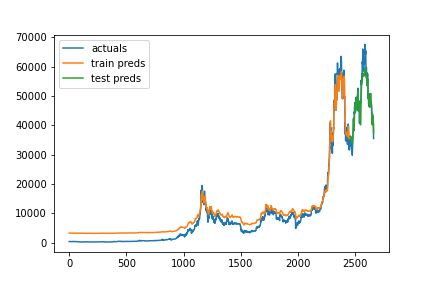

In [446]:
# plot baseline and predictions
%matplotlib widget
# plt.figure(figsize=(20,5))
plt.plot(scaler.inverse_transform(np.array(df2[0]).reshape(-1,1)), label='actuals')
plt.plot(alfa,label='train preds')
plt.plot(beta, label='test preds')
plt.legend()
plt.show();

# Predict Next 30 Days

In [426]:
x_input = np.array(df2[0].iloc[-shifts_count:])
temp_x = x_input.tolist()
print(len(temp_x), shifts_count)

predictions = []
future_days = 30

while(future_days > 0):
    if len(temp_x) > shifts_count:
        x_input = np.array(temp_x[-shifts_count:])
        x_input = x_input.reshape((1, shifts_count,1))
        y_hat = model.predict(x_input)
    else:
        x_input = x_input.reshape((1, shifts_count,1))
        y_hat = model.predict(x_input)
        
    temp_x.extend(y_hat[0].tolist())
    predictions.extend(y_hat[0])
    future_days -= 1
    
print(len(predictions))

25 25
30


In [427]:
scaler.inverse_transform(np.array(predictions).reshape(-1,1))[:,0]

array([46763.098, 47161.88 , 47232.043, 47614.07 , 47139.78 , 46263.973,
       45050.047, 43023.863, 41917.14 , 40752.54 , 40995.008, 41354.348,
       41961.996, 42994.836, 43359.086, 42643.074, 43000.71 , 42848.156,
       42349.07 , 41456.08 , 40670.008, 38892.76 , 37423.156, 36973.19 ,
       40612.53 , 47098.375, 47465.07 , 47609.766, 47549.97 , 46926.336],
      dtype=float32)

In [428]:
# print(list(range(0,len(df2)))[-1])
# print(list(range(len(df2),len(df2)+future_days))[0])
# print(list(range(len(df2),len(df2)+future_days))[-1])
list(range(len(df2),len(df2)+future_days))
len(df2), len(df2)+future_days

(2660, 2660)

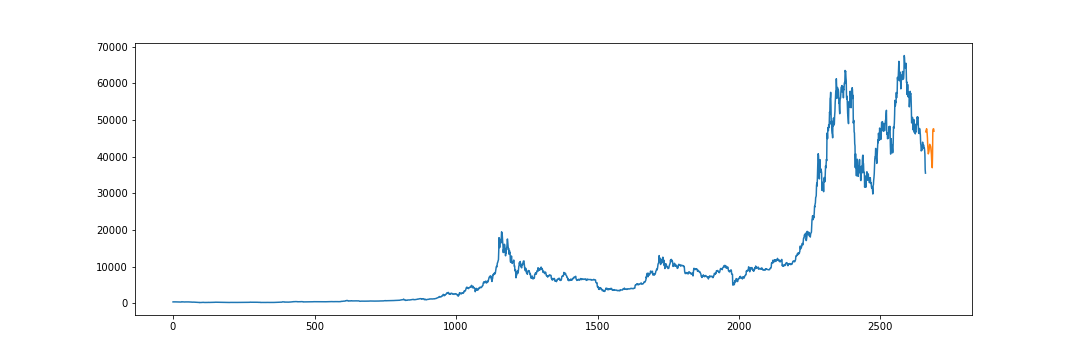

In [447]:
%matplotlib widget
future_days = 30
plt.figure(figsize=(15,5))
plt.plot(range(0,len(df2)), scaler.inverse_transform(np.array(df2[0]).reshape(-1,1)))
plt.plot(range(len(df2),len(df2)+future_days), scaler.inverse_transform(np.array(predictions).reshape(-1,1)))
plt.show();

### References

1. [How to get Stock Market Data in Python?](https://blog.quantinsti.com/stock-market-data-analysis-python/)
2. [How to get INDIAN stock prices with Python?](https://www.youtube.com/watch?v=HmgmhOpS42A)